In [1]:
import matplotlib.pyplot as plt
import lifa.fames.process_mixing_ratio as em
#from lifa.fames.reports import plot_signal
#import fames_reports as fames
import lifa.fames.reports as reports
from importlib import reload

import glob
import numpy as np

### Lista de arquivos

In [ ]:
# Gera lista de arquivos a serem processados. Arquivos precisam estar ordenados
files = sorted(glob.glob(r'.\sample_data\20241204_CEPEMA_FLARE_acima da chama_p=23\a???????.??????'))
#files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Meio chama p=23mm bom pra caralho\a???????.??????'))
#files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Topo chama p-23mm\a???????.??????'))
#files = sorted(glob.glob(r'c:\Users\jairo\Documents\Medidas FAMES\Mikhail\medidas-Mikhail\20240904\20240904\pinhoe26.469 full ap top the fire\a???????.??????'))
title = "Esquerda da chama"
files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20240903-Mikail\medidas-Mikhail\20240904\20240904\pinhole21 full app left the fire\a???????.??????'))
title = "No flame"
files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20240903-Mikail\medidas-Mikhail\20240904\20240904\pinhole26.465 full ap No FLAME\a???????.??????'))
title = "Top flame"
files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20240903-Mikail\medidas-Mikhail\20240904\20240904\pinhole26.465 full ap top the fire\a???????.??????'))



['d:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.251331',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.255439',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.263546',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.271653',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.275761',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.283869',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 QUEIMADOR\\sem chama\\a25A0917.291976',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20251009 QUEIMADOR-20251113T171454Z-1-001\\20251009 

In [ ]:
# Dados gerados alex/jairo - sem case
#title = "Acima flare - p=23mm"; files = sorted(glob.glob(r'.\sample_data\20241204_CEPEMA_FLARE_acima da chama_p=23\a???????.??????'))

#title = "Base flare - p=23mm"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Em baixo chama p 23\a???????.??????'))

#title = "Centro flare - p=23mm"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Meio chama p=23mm\a???????.??????'))



In [ ]:
# Dados queimador CEPEMA
#a -> at the flare center
#b -> out of the flare (usually to the side)
#t -> at the top of (or over) the flare
#g -> grid measurement

#title = "Queimador - chama amarela - dentro da chama";files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\chama amarela\a???????.??????'))

#title = "Queimador - chama amarela - topo da chama"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\chama amarela\t???????.??????'))

#title = "Queimador - chama amarela - background da chama";s = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\chama amarela\b???????.??????'))

#title = "Queimador - chama azul - dentro da chama";files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\chama azul\a???????.??????'))

#title = "Queimador - chama azul - topo da chama"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\chama azul\t???????.??????'))

#title = "Queimador - chama azul - background da chama"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\chama azul\b???????.??????'))

#title = "Queimador - sem chama - topo"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\sem chama\t???????.??????'))

#title = "Queimador - sem chama - centro"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20251009 QUEIMADOR-20251113T171454Z-1-001\20251009 QUEIMADOR\sem chama\a???????.??????'))





In [ ]:
# Medidas Leo e Zé

title = "Flare - centro"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20250919 FLARE-20251114T184737Z-1-001\20250919 FLARE\a???????.??????'))

title = "Flare - topo"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20250919 FLARE-20251114T184737Z-1-001\20250919 FLARE\t???????.??????'))

title = "Flare - lado"; files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20250919 FLARE-20251114T184737Z-1-001\20250919 FLARE\b???????.??????'))



In [72]:
files

['d:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.183376',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.191520',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.195664',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.203809',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.211954',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.220098',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.224243',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.232388',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.240532',
 'd:\\FAMES\\Medidas\\Medidas CEPEMA\\20241204-Alex e Jairo\\Meio chama p=23mm\\a24C0505.244677',
 'd:\\FAMES\\Medidas

### Configuração de processamento

In [73]:
# Configuração do processamento
config = {
    'zenith_angle': 12,         # angulo com o horizonte do feixe laser
    'elevation': 0,             # altitude
    'cross_talk_355_353': 160,  # fator de cross talk entre 355 e 353
    'ch4_cal': 4000,            # calibracao CH4
    'co2_cal': 26000,           # calibracao co2
    'ce_cal': 0.25,             # calibracao ce mixing ratio
    'fluo_cal': 100,            # calibracao fluorescencia
    'dead_time': 1/240,         # correcao deadtime em ns
    'background_min_idx': 4000, #index min para regiao de background ~12000
    'background_max_idx' : 4900, #index max para regiao considerada background ~15000
    'z_min_flare': 100,         # distancia minima do sinal em metros
    'z_max_flare': 450,         # distancia maxima do sinal em metros
    'n2_raman': {'channel':'00353.o_an', 'bin_shift':0, 'lambda': 323},     # canal de referencia N2 raman
    'rayleigh': {'channel':'00355.o_an', 'bin_shift':0, 'lambda': 355},     # canal espalhamento laser
    'co2_raman': {'channel':'00371.o_ph', 'bin_shift':3, 'lambda': 371},    # canal de raman co2
    'ch4_raman_s': {'channel':'00395.s_ph', 'bin_shift':3, 'lambda': 395},  # canal de raman ch4 polarizacao s
    'ch4_raman_p': {'channel':'00395.p_ph', 'bin_shift':3, 'lambda': 395},  # canal raman ch4 polarizacao p
    'fluorescence': {'channel':'00460.o_an', 'bin_shift':1, 'lambda': 460}, # canal de fluorescencia
    'n2_raman_b': {'channel':'00530.o_an', 'bin_shift':0, 'lambda': 530},   # canal raman N2 para 532 nm
    'rayleigh_b': {'channel':'00532.o_an', 'bin_shift':0, 'lambda': 532},   # canal espalhamento em 532 nm 
}

### Processamento

In [74]:
# Junta arquivos em grupos e processa. Saida é um Dataframe pandas
step = 1    # Passo para grupos de média
size = 5   # Numero de arquivos sequencias para media
reload(em)
output = em.emissions_group(files, config=config, step=step, size=size)
output

,start_time,stop_time,duration,bin_width,cross_talk_355_353,ch4_cal,co2_cal,ce_cal,fluo_cal,z_trace,...,n2_raman_trace,rayleigh_trace,co2_raman_trace,ch4_raman_s_trace,ch4_raman_p_trace,fluorescence_trace,rayleigh_b_trace,n2_raman_b_trace,number_of_files,files
0,2024-12-05 05:17:52+00:00,2024-12-05 05:21:19+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.480336448724216, 7.803262043120705, 9.08665...","[230.81199294765324, 266.2915934355991, 299.78...","[0.11999067204557029, 0.14544694013910608, 0.1...","[0.011547830006312765, -0.047662191005365395, ...","[-0.0011496781912679888, 0.03209050347608224, ...","[0.04174124257893563, 0.03784665118658115, 0.0...","[60.591215444538726, 71.74374532067118, 83.481...","[2.1123723134585095, 2.5160235357512635, 2.905...",5,[d:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex...
1,2024-12-05 05:18:34+00:00,2024-12-05 05:22:00+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.700539593913492, 8.067912661698847, 9.38175...","[196.33856747394663, 228.78312688907064, 261.2...","[0.1292265602488133, 0.14097608585432952, 0.18...","[0.0013722942829772489, -0.020344976452045582,...","[-0.0005501211715353282, 0.032690601955039957,...","[0.03704833184406198, 0.03476380207333296, 0.0...","[60.51422997343759, 72.06457604276164, 84.3205...","[2.1116055735741304, 2.5207630888343644, 2.909...",5,[d:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex...
2,2024-12-05 05:19:15+00:00,2024-12-05 05:22:42+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.9790342987748915, 8.377755445796387, 9.7020...","[164.70666011289896, 193.90577018467712, 223.8...","[0.09611789170352933, 0.14506906191909, 0.1705...","[-0.00417419219916404, -0.04958005845405333, -...","[0.0066338771400956675, 0.032054081742524915, ...","[0.032699699943589344, 0.029615096494222115, 0...","[61.52053466161615, 73.14602004592193, 85.1819...","[2.1199786093741784, 2.527951481859705, 2.9161...",5,[d:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex...
3,2024-12-05 05:19:57+00:00,2024-12-05 05:23:23+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.944930329088743, 8.352299472726271, 9.68126...","[165.67519159181265, 194.9573489088994, 224.17...","[0.09779747319183804, 0.13891578579480285, 0.1...","[-0.00402289017330526, -0.023767317832271262, ...","[0.020092967539300018, 0.024003863795879717, 0...","[0.0300745124883095, 0.02795897247156187, 0.02...","[62.11913824824997, 73.60058614381504, 85.5789...","[2.1138993313135144, 2.523892626512712, 2.9174...",5,[d:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex...
4,2024-12-05 05:20:38+00:00,2024-12-05 05:24:05+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[7.004765237407952, 8.42225904164499, 9.753978...","[168.47260485422677, 197.8520445857306, 226.71...","[0.08746313532824165, 0.14816258673423033, 0.1...","[0.018468702393333425, 0.030319820244683715, -...","[0.02884076186667059, 0.022974178571601514, 0....","[0.028942757137285113, 0.026626248273281306, 0...","[63.54620455932666, 75.07474111066621, 86.8956...","[2.124079340354048, 2.531201076972372, 2.92435...",5,[d:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex...
5,2024-12-05 05:21:20+00:00,2024-12-05 05:24:46+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,"[99.375, 103.125, 106.875, 110.625, 114.375, 1...",...,"[6.960983965707687, 8.374802829824455, 9.70581...","[168.72692296216138, 197.63879555089397, 225.3...","[0.06636777601431071, 0.12901557261106955, 0.1...","[-0.01053794777215189, 0.03687273340759911, -0...","[0.027576451491616624, 0.015843571591382874, 0...","[0.026637154378194694, 0.02143291102832734, 0....","[64.08369889615517, 75.39689911669909, 86.6272...","[2.1159200512894634, 2.5227357874931036, 2.920...",5,[d:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex...
6

### Apresentação

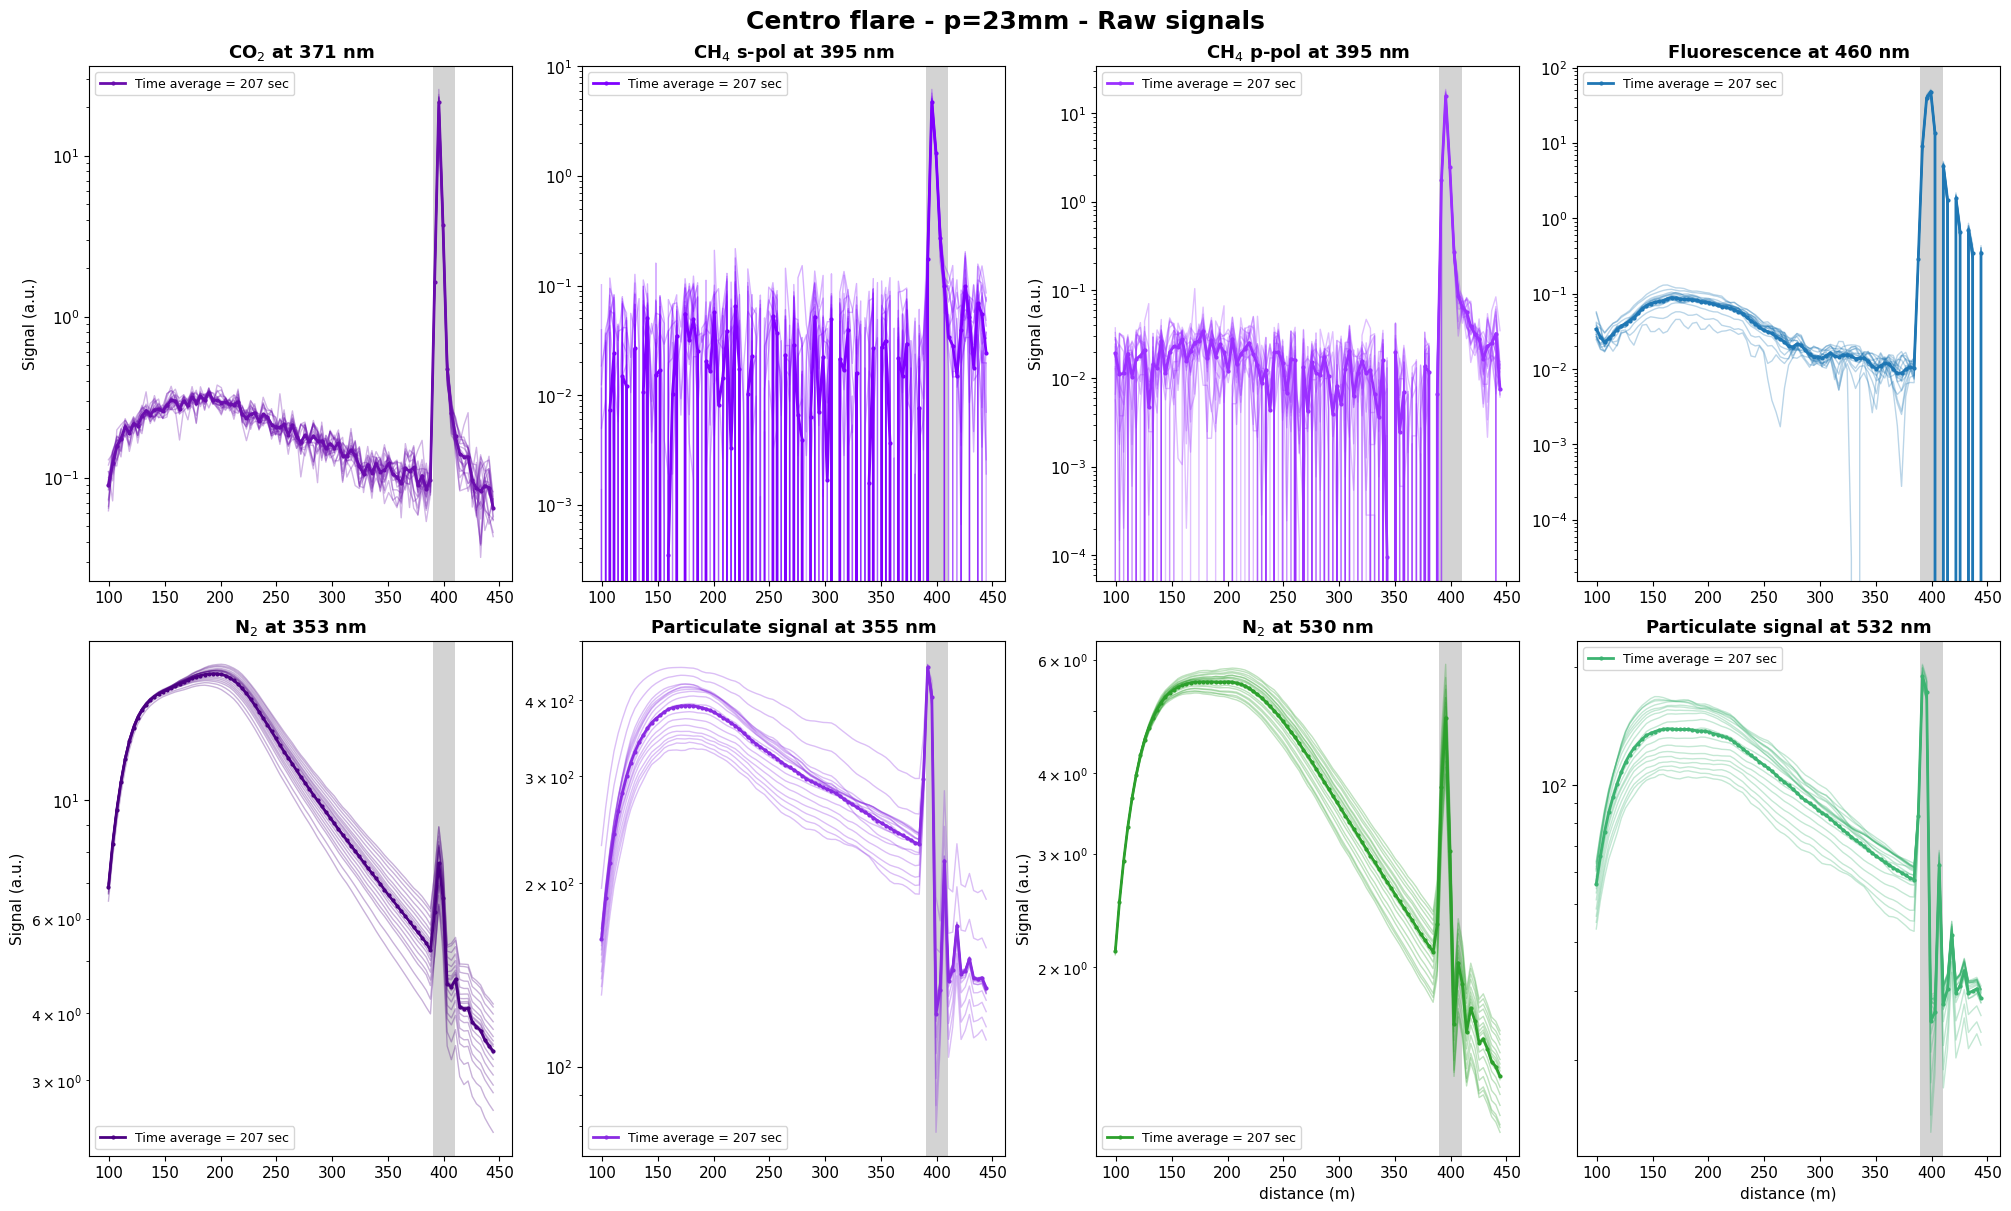

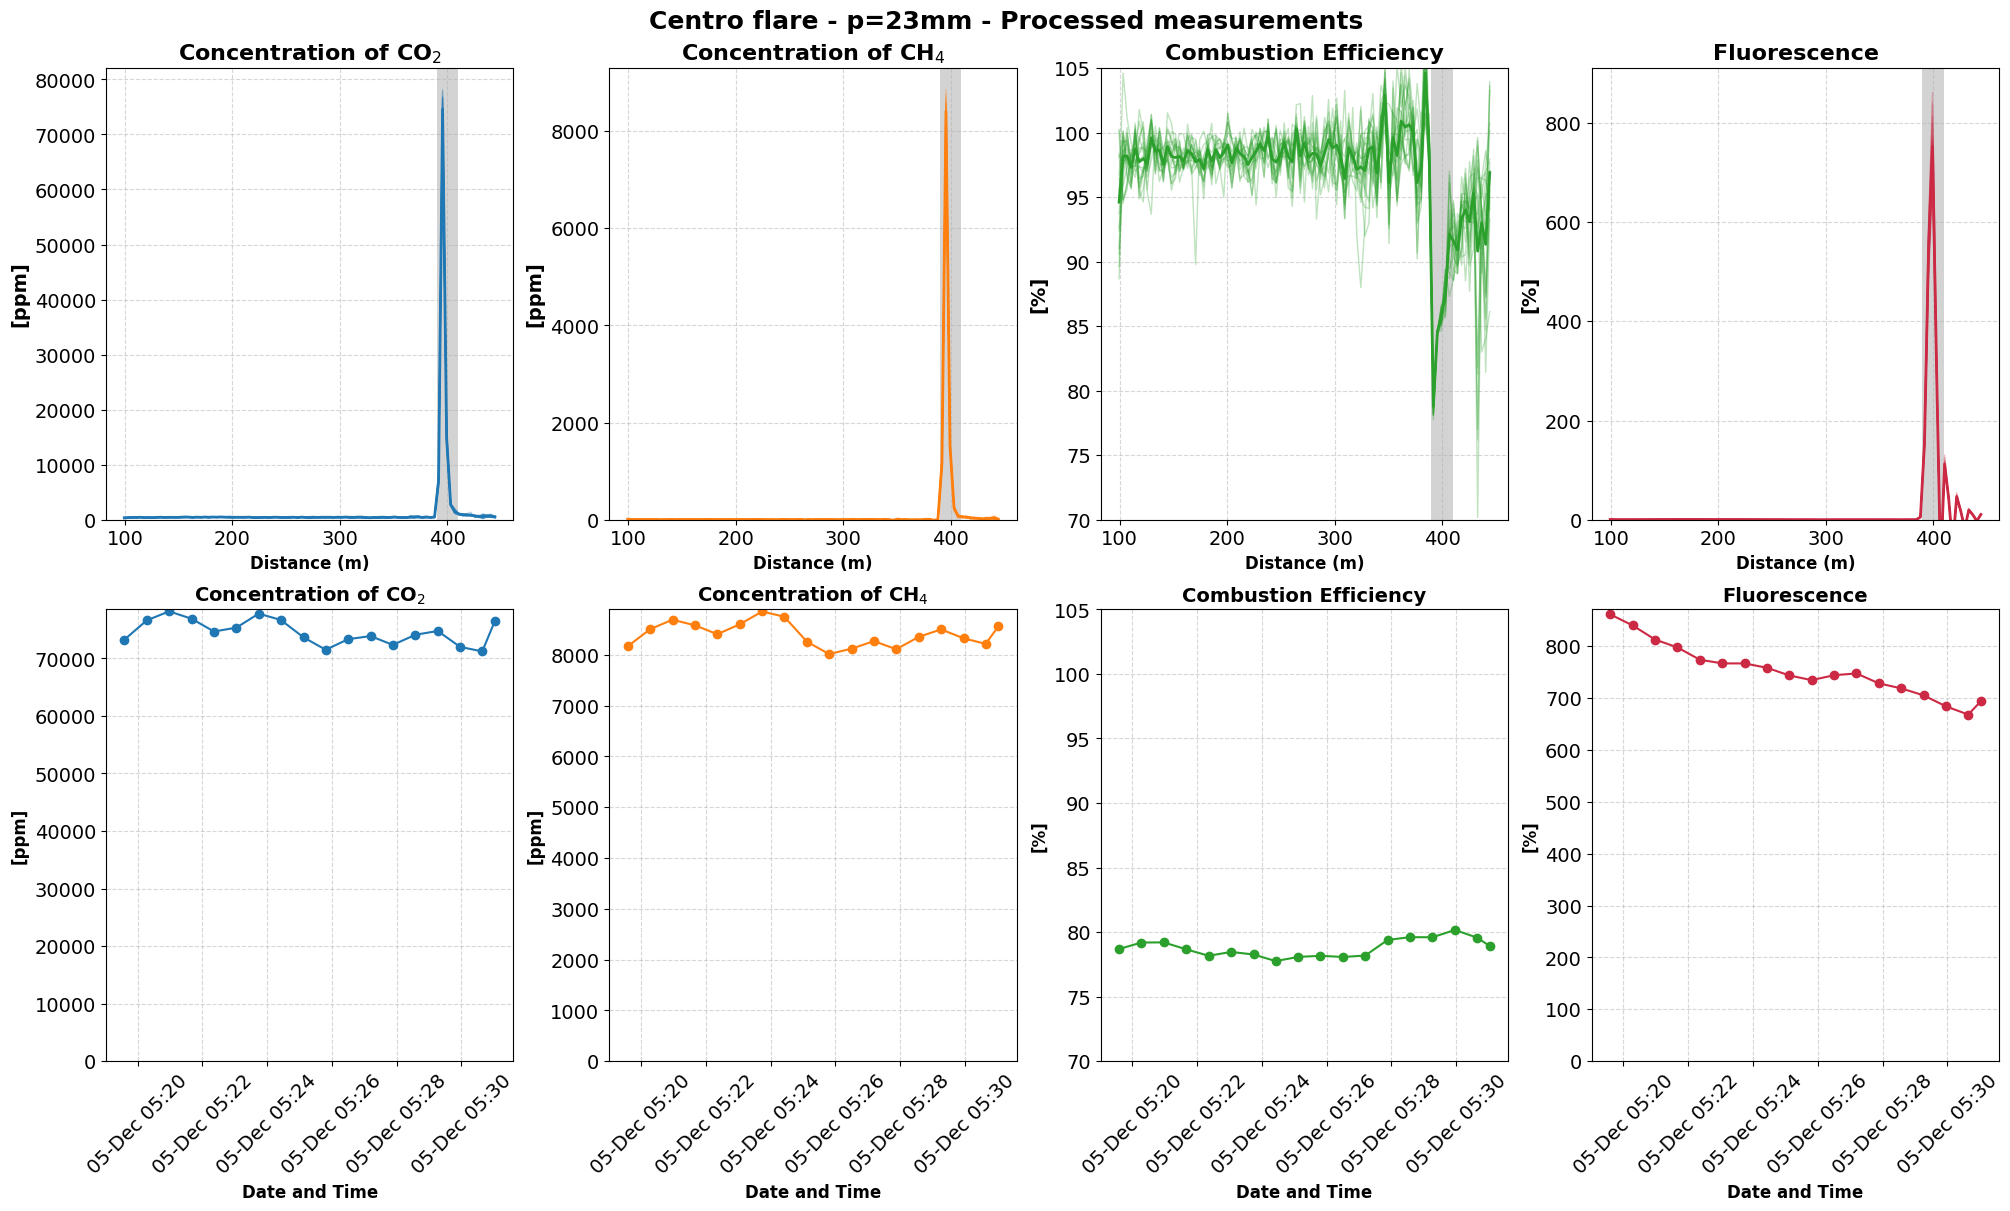

In [75]:

reload(reports)

# Titulo no graficos
#title = "Titulo"
# filtra dados se necessário antes de plotas
filtered = output
min_z = 390
max_z = 410
fig = reports.plot_signals(filtered, min_z, max_z, title + " - Raw signals")
plt.show()
fig_mix = reports.plot_emissions(filtered, min_z, max_z, title + " - Processed measurements")
plt.show()
